In [ ]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [ ]:
# ワードクラウド作成用ライブラリのインストール（最初から入っているので不要でした。）
!pip install wordcloud

In [ ]:
#ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#fontフォルダをコピー
!cp -a "/content/drive/MyDrive/font/" "/usr/share/fonts/"

In [ ]:
#データの取り込み。ファイルのパスや文字コードは処理ファイルに合わせてください。デモとしてkokoro.txtを使っています。
f = open('/content/drive/MyDrive/kokoro.txt', encoding ='shift_jis')
text = f.read()  # ファイル終端まで全て読んだデータを返す
f.close()

In [ ]:
text

'こころ\n夏目漱石\n\n-------------------------------------------------------\n【テキスト中に現れる記号について】\n\n《》：ルビ\n（例）私《わたくし》は\n\n｜：ルビの付く文字列の始まりを特定する記号\n（例）先生一人｜麦藁帽《むぎわらぼう》を\n\n［＃］：入力者注\u3000主に外字の説明や、傍点の位置の指定\n\u3000\u3000\u3000（数字は、JIS X 0213の面区点番号、または底本のページと行数）\n（例）※［＃「てへん＋劣」、第3水準1-84-77］\n-------------------------------------------------------\n\n［＃２字下げ］上\u3000先生と私［＃「上\u3000先生と私」は大見出し］\n\n\n［＃５字下げ］一［＃「一」は中見出し］\n\n\u3000私《わたくし》はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚《はば》かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執《と》っても心持は同じ事である。よそよそしい頭文字《かしらもじ》などはとても使う気にならない。\n\u3000私が先生と知り合いになったのは鎌倉《かまくら》である。その時私はまだ若々しい書生であった。暑中休暇を利用して海水浴に行った友達からぜひ来いという端書《はがき》を受け取ったので、私は多少の金を工面《くめん》して、出掛ける事にした。私は金の工面に二《に》、三日《さんち》を費やした。ところが私が鎌倉に着いて三日と経《た》たないうちに、私を呼び寄せた友達は、急に国元から帰れという電報を受け取った。電報には母が病気だからと断ってあったけれども友達はそれを信じなかった。友達はかねてから国元にいる親たちに勧《すす》まない結婚を強《し》いられていた。彼は現代の習慣からいうと結婚するにはあまり年が若過ぎた。それに肝心《かんじん》の当人が気に入らなかった。それで夏休みに当然帰るべきところを、わざと避けて東京の近くで遊んでいたのである。彼は電報を私に見せてどうしようと相談をした。私にはどうしていいか分らなかった。けれども実際彼の母が

In [ ]:
#単語の分割 単語を原型にしてスペースで区切って連結。名詞・動詞・形容詞のみ
import MeCab
m = MeCab.Tagger ('-Ochasen')
 
word=""
#文書を単語にわける
node = m.parseToNode(text)
#各単語の処理
while node:
    #品詞を取得
    hinshi = node.feature.split(",")[0]
    #名詞・動詞・形容詞のみ処理
    if hinshi in ["名詞","動詞","形容詞"]:
        #単語の原型を取得
        origin = node.feature.split(",")[6]
        #除去するワードに該当しないか確認。除去したいワードを適宜[]の中に追加してください。
        if origin not in ["する","いる","ある","なる"]:
            word = word + " " + origin
    node = node.next

In [ ]:
#ワードクラウドの作成
from wordcloud import WordCloud
#fontのパスの指定
fpath = "/usr/share/fonts/YUGOTHR.TTC"
#ワードクラウドの作成
wordcloud = WordCloud(background_color="white",font_path=fpath,width=600,height=400,min_font_size=15)
wordcloud.generate(word)
#保存
wordcloud.to_file("/content/drive/MyDrive/wordcloud.png")

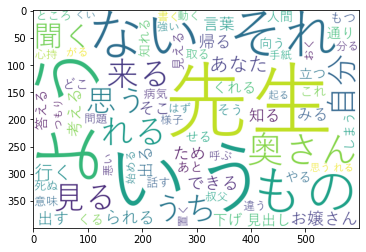

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)